In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def factor_driver_age(age):
    if age > 50:
        return 1
    return age/50

def factor_increase(increase):
    if increase == 50:
        return 0
    return 1-increase/50

def renewal_rate(row):
    return (0.5*(factor_driver_age(row["Driver_Age"])*factor_increase(row["Increase_Percentage"]))+np.random.random()/5.0) >= 0.5

In [28]:
renewal_df = pd.read_csv("data/synthetic data/updated_insurance_renewal_dataset.csv")
renewal_df["new_pred"] = renewal_df.apply(renewal_rate, axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X = renewal_df.loc[:, ["Driver_Age","Increase_Percentage","Total_Premium"]].values
y = renewal_df.loc[:,"new_pred"]
#scaler = StandardScaler().fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8312121212121212

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf_tree.score(X_test, y_test)

0.8421212121212122

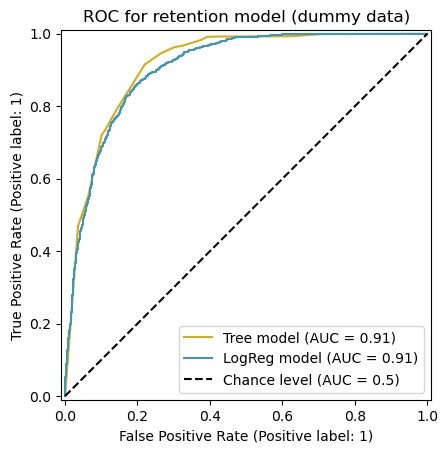

In [32]:
from sklearn import metrics
fig, ax = plt.subplots()
tree_probs = np.apply_along_axis(lambda x: x[1],arr=clf_tree.predict_proba(X_test),axis=1)
log_probs = np.apply_along_axis(lambda x: x[1],arr=clf.predict_proba(X_test),axis=1)
metrics.RocCurveDisplay.from_predictions(y_test, tree_probs, ax=ax,name="Tree model", color="#d9ab16")
metrics.RocCurveDisplay.from_predictions(y_test, log_probs, plot_chance_level=True, ax=ax, name="LogReg model", color="#4096b8")
plt.title("ROC for retention model (dummy data)")
plt.show()

In [25]:
def roc_report(model, model_name):
    model_probs = np.apply_along_axis(lambda x: x[1],arr=model.predict_proba(X_test),axis=1)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model_probs)
    print("ROC report for %s" % model_name)
    print("FPR",fpr)
    print("TPR",tpr)
    print("Thresholds",thresholds)

In [26]:
roc_report(clf_tree, "Tree")
roc_report(clf, "Logistic regression")

ROC report for Tree
FPR [0.         0.01909222 0.03097983 0.04935159 0.05979827 0.06808357
 0.08789625 0.11095101 0.13040346 0.16066282 0.1721902  0.1851585
 0.2323487  0.25360231 0.44920749 1.        ]
TPR [0.         0.51717557 0.63931298 0.76335878 0.79389313 0.82251908
 0.89694656 0.94847328 0.96755725 0.99045802 0.99236641 0.99236641
 0.9980916  1.         1.         1.        ]
Thresholds [       inf 0.8625     0.66836735 0.57142857 0.43023256 0.37096774
 0.36756757 0.24431818 0.14049587 0.13186813 0.08333333 0.07462687
 0.01090909 0.00806452 0.00087719 0.        ]
ROC report for Logistic regression
FPR [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.60230548e-04
 3.60230548e-04 7.20461095e-04 7.20461095e-04 1.08069164e-03
 1.08069164e-03 1.44092219e-03 1.44092219e-03 1.80115274e-03
 1.80115274e-03 2.16138329e-03 2.16138329e-03 2.52161383e-03
 2.52161383e-03 2.88184438e-03 2.88184438e-03 3.60230548e-03
 3.60230548e-03 4.32276657e-03 4.32276657e-03 5.40345821e-03
 5.40345821e-03 6

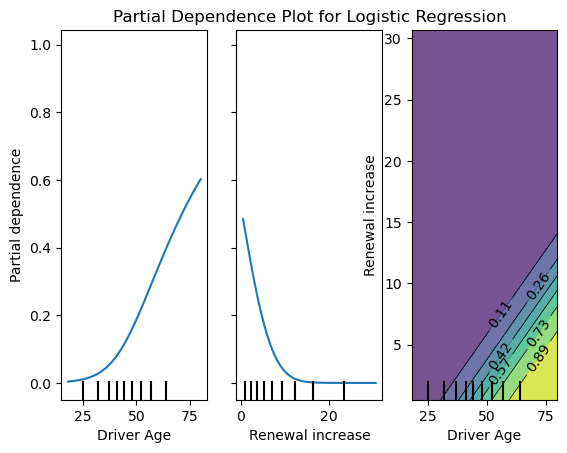

In [31]:
from sklearn.inspection import PartialDependenceDisplay

features = [0, 1, (0, 1)]
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(clf, X, features, feature_names=["Driver Age", "Renewal increase"], ax=ax)
ax.set_title("Partial Dependence Plot for Logistic Regression")
plt.show()

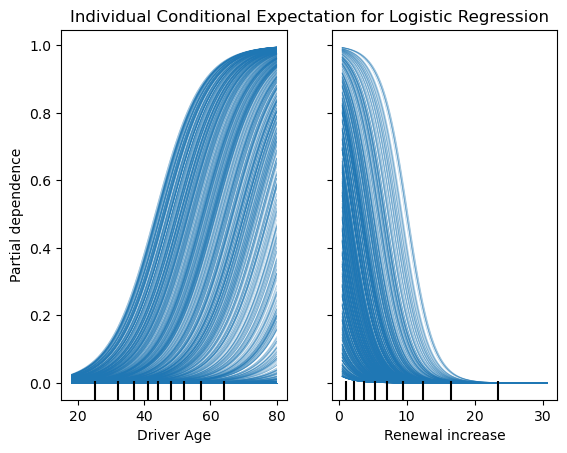

In [32]:
from sklearn.inspection import PartialDependenceDisplay

features = [0, 1]
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(clf, X, features, feature_names=["Driver Age", "Renewal increase"], ax=ax, kind="individual")
ax.set_title("Individual Conditional Expectation for Logistic Regression")
plt.show()